In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json

from copy import deepcopy

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from dotenv import load_dotenv, find_dotenv
from pathlib import Path

# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()
project_dir = Path(dotenv_path).parent

# load up the entries as environment variables
load_dotenv(dotenv_path)

True

In [3]:
model_name = 'pso'

test_preds_fpath = project_dir/f'reports/{model_name}_test_preds.json'
test_times_fpath = project_dir/f'reports/{model_name}_test_times.json'

assert test_preds_fpath.exists()
assert test_times_fpath.exists()

In [4]:
with open(test_preds_fpath, 'r') as f:
    preds = json.load(f)

with open(test_times_fpath, 'r') as f:
    times = json.load(f)

len(times), len(preds)

(2021, 2021)

In [11]:
sim = np.array([s.split('.')[0] for s in preds.keys()])
y_hat = np.array(list(preds.values()))
y_hat = pd.Series(y_hat, sim)

y_hat

simulacao391_0051    15
simulacao391_0005     7
simulacao95_0073     19
simulacao552_0030    21
simulacao708_0004     5
                     ..
simulacao148_0059    16
simulacao811_0049    16
simulacao868_0081    18
simulacao720_0091    20
simulacao900_0000     6
Length: 2021, dtype: int64

In [13]:
sim = np.array([s.split('.')[0] for s in times.keys()])
t = np.array(list(times.values()))
t = pd.Series(t, sim)

t

simulacao391_0051    152.296066
simulacao391_0005     74.274453
simulacao95_0073     190.868107
simulacao552_0030    207.318765
simulacao708_0004     55.261035
                        ...    
simulacao148_0059    166.228421
simulacao811_0049    164.078300
simulacao868_0081    182.380575
simulacao720_0091    200.232231
simulacao900_0000     64.829446
Length: 2021, dtype: float64

In [22]:
df = pd.DataFrame([y_hat, t]).T
df = df.reset_index()
df.columns = ['Sim', 'y_hat', 't']

df['y'] = df['Sim'].apply(lambda s: int(s.split('_')[-1]))
df['model'] = model_name
df['error'] = (df['y'] - df['y_hat']).abs()
df

,Sim,y_hat,t,y,model,error
0,simulacao391_0051,15.0,152.296066,51,pso,36.0
1,simulacao391_0005,7.0,74.274453,5,pso,2.0
2,simulacao95_0073,19.0,190.868107,73,pso,54.0
3,simulacao552_0030,21.0,207.318765,30,pso,9.0
4,simulacao708_0004,5.0,55.261035,4,pso,1.0
...,...,...,...,...,...,...
2016,simulacao148_0059,16.0,166.228421,59,pso,43.0
2017,simulacao811_0049,16.0,164.078300,49,pso,33.0
2018,simulacao868_0081,18.0,182.380575,81,pso,63.0
2019,simulacao720_0091,20.0,200.232231,91,pso,71.0


In [23]:
df_ = df.copy()
df_['model'] = 'test'
df_

,Sim,y_hat,t,y,model,error
0,simulacao391_0051,15.0,152.296066,51,test,36.0
1,simulacao391_0005,7.0,74.274453,5,test,2.0
2,simulacao95_0073,19.0,190.868107,73,test,54.0
3,simulacao552_0030,21.0,207.318765,30,test,9.0
4,simulacao708_0004,5.0,55.261035,4,test,1.0
...,...,...,...,...,...,...
2016,simulacao148_0059,16.0,166.228421,59,test,43.0
2017,simulacao811_0049,16.0,164.078300,49,test,33.0
2018,simulacao868_0081,18.0,182.380575,81,test,63.0
2019,simulacao720_0091,20.0,200.232231,91,test,71.0


<AxesSubplot:title={'center':'error'}, xlabel='model'>

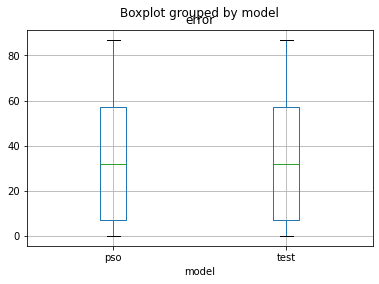

In [28]:
pd.concat([df, df_]).boxplot('error', 'model')

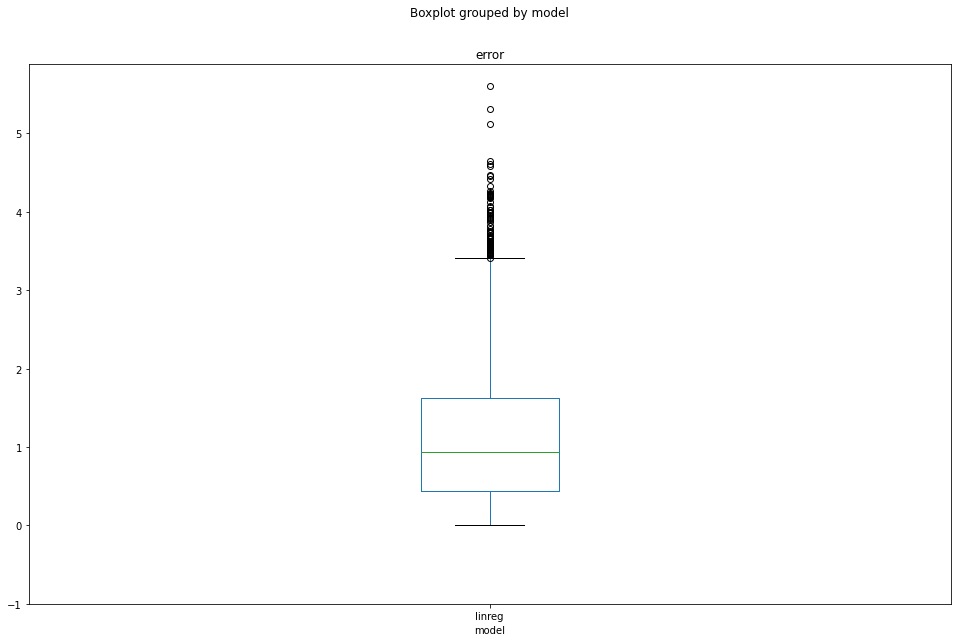

In [40]:
fig, ax = plt.subplots()

fig.set_size_inches(16,10)

df.boxplot('error', 'model', ax=ax)

ax.set_ylim(-1, ax.get_ylim()[1])

ax.grid(False)

fig.show()

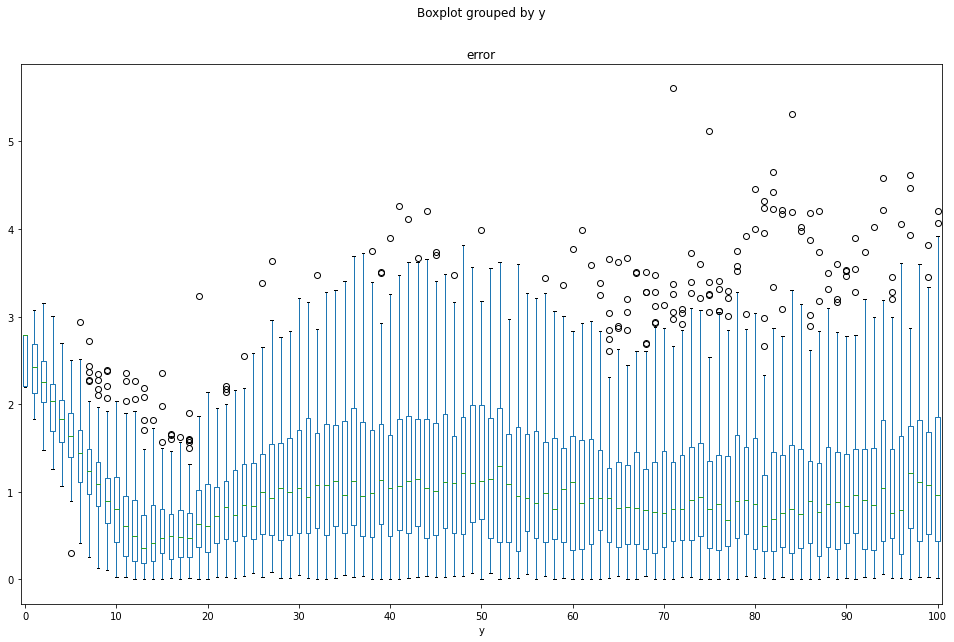

In [41]:
fig, ax = plt.subplots()

fig.set_size_inches(16,10)

df.boxplot('error', 'y', ax=ax)

xticks = np.linspace(0,100,11)

ax.set_xticks(xticks+1, xticks.astype(int))
ax.grid(False)

fig.show()

In [30]:
df_['model'].unique()

array(['test'], dtype=object)

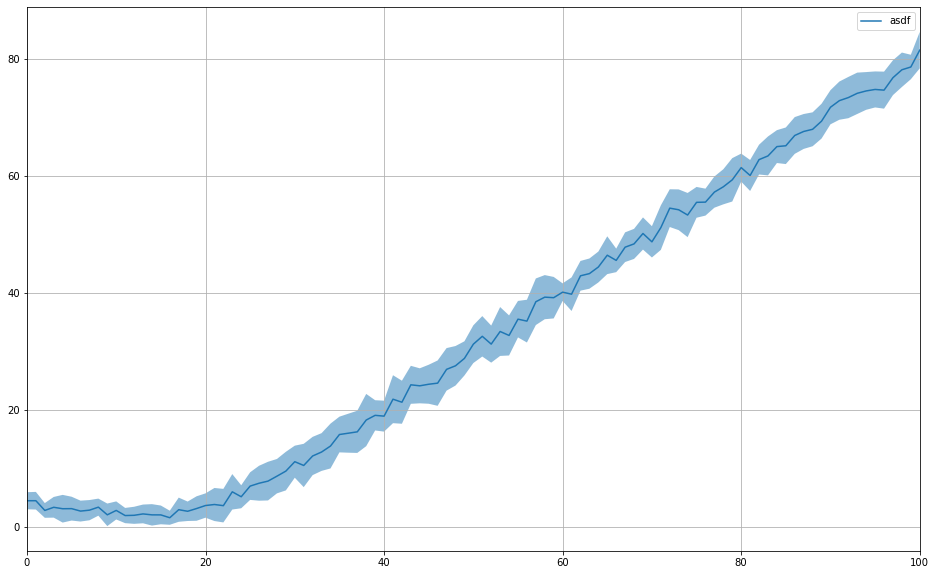

In [36]:
fig, ax = plt.subplots()

fig.set_size_inches(16,10)

err_mean = df.groupby('y')['error'].mean()
err_std = df.groupby('y')['error'].std()

ax.plot(err_mean.index, err_mean, label='asdf')
ax.fill_between(err_mean.index, err_mean + err_std, err_mean - err_std, alpha=0.5)

ax.set_xlim(0, 100)
ax.legend()
ax.grid()

fig.show()

In [48]:
df['y_hat']

0       15.0
1        7.0
2       19.0
3       21.0
4        5.0
        ... 
2016    16.0
2017    16.0
2018    18.0
2019    20.0
2020     6.0
Name: y_hat, Length: 2021, dtype: float64

In [56]:
acc = (df['y_hat'] + 0.5).astype(int) == df['y']
acc.sum() / acc.size

0.01929737753587333